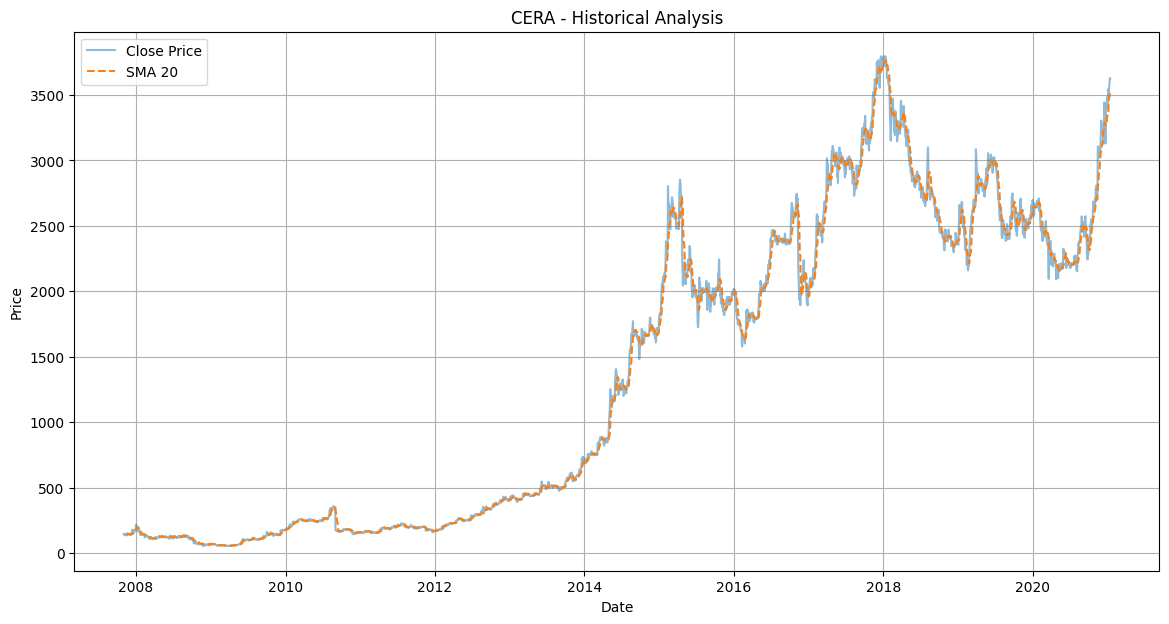

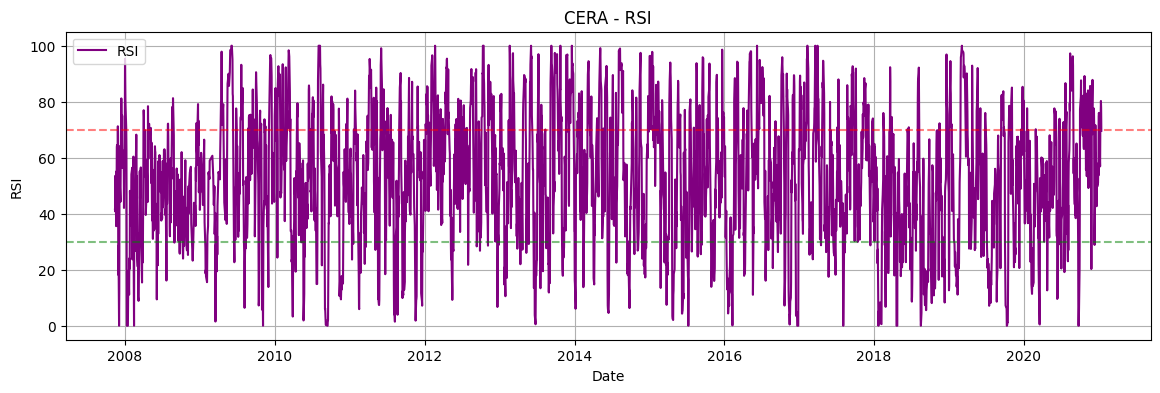

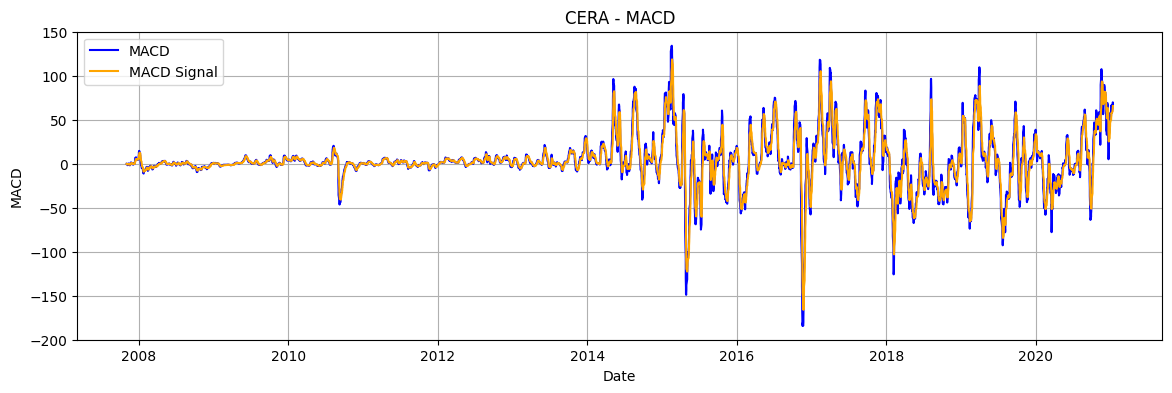

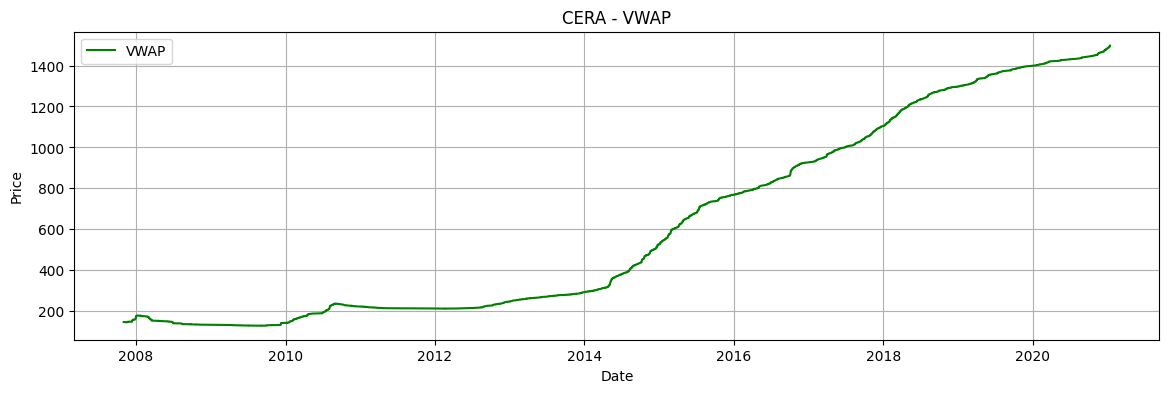

In [1]:
# historical_analysis.ipynb

import pandas as pd
import matplotlib.pyplot as plt

# Load Data
stock_name = input("Enter stock name: ")
bo_path = f"C:\\Users\\KIIT\\Desktop\\Stock-Market-Dashboard\\cleaned_data\\{stock_name}-bo.csv"
ns_path = f"C:\\Users\\KIIT\\Desktop\\Stock-Market-Dashboard\\cleaned_data\\{stock_name}-ns.csv"

try:
    df_bo = pd.read_csv(bo_path, parse_dates=['Date'])
    df_ns = pd.read_csv(ns_path, parse_dates=['Date'])
except FileNotFoundError:
    print(f"Data for {stock_name} not found.")
    exit()

# Merge and Sort
df = pd.concat([df_bo, df_ns]).sort_values(by='Date').reset_index(drop=True)

# Compute Simple Moving Average (SMA)
df['SMA_20'] = df['Close'].rolling(window=20).mean()

# Compute Relative Strength Index (RSI)
delta = df['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# Compute MACD
exp1 = df['Close'].ewm(span=12, adjust=False).mean()
exp2 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = exp1 - exp2
df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Compute VWAP (Volume-Weighted Average Price)
df['Cumulative_Volume'] = df['Volume'].cumsum()
df['Cumulative_Price_Volume'] = (df['Close'] * df['Volume']).cumsum()
df['VWAP'] = df['Cumulative_Price_Volume'] / df['Cumulative_Volume']

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['Date'], df['SMA_20'], label='SMA 20', linestyle='--')
plt.title(f'{stock_name} - Historical Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot RSI
plt.figure(figsize=(14, 4))
plt.plot(df['Date'], df['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title(f'{stock_name} - RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

# Plot MACD
plt.figure(figsize=(14, 4))
plt.plot(df['Date'], df['MACD'], label='MACD', color='blue')
plt.plot(df['Date'], df['MACD_Signal'], label='MACD Signal', color='orange')
plt.title(f'{stock_name} - MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.grid(True)
plt.show()

# Plot VWAP
plt.figure(figsize=(14, 4))
plt.plot(df['Date'], df['VWAP'], label='VWAP', color='green')
plt.title(f'{stock_name} - VWAP')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
